In [31]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset

In [32]:
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes = load_dataset()
train_set_x_orig.shape,train_set_y.shape

((209, 64, 64, 3), (1, 209))

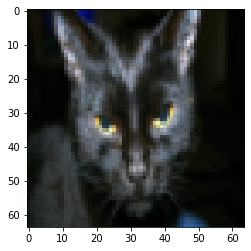

In [33]:
# 查看图片
plt.imshow(train_set_x_orig[25])

In [34]:
# 构造训练集和测试集
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
train_set_x_flatten.shape,test_set_x_flatten.shape

((12288, 209), (12288, 50))

In [35]:
# 数据标准化
train_set_x = train_set_x_flatten/255
test_set_x_ = test_set_x_flatten/255

In [36]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [37]:
# 初始化参数w和b
w = np.zeros((train_set_x.shape[0],1))
w.shape
b = 0

In [38]:
def propagate(w,b,X,Y):
    m = X.shape[1]
    
    A = sigmoid(w.T @ X + b)
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    
    dw = X @ (A - Y).T / m
    db = np.sum(A - Y) / m
    
    cost = np.squeeze(cost) # 将cost转换为（dim，）
    
    grads = {
        "dw":dw,
        "db":db
    }
    
    return grads,cost

In [39]:
def gradient_des(w,b,X,Y,iters,a,print_cost=False):
    """梯度下降"""
    costs = []
    
    for i in range(iters):
        grads,cost = propagate(w,b,X,Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - a * dw 
        b = b - a * db
        
        costs.append(cost)
        
        if (print_cost) and (i % 100 == 0):
            print("迭代次数： %d， 误差为： %f" % (i,cost))
            
            
    params = {
        "w":w,
        "b":b
    }
    grads = {
    "dw":dw,
    "db":db
    }
    
    return params,grads,costs
        

In [40]:
def predict(w,b,X):
    """预测"""
    m = X.shape[1]
    Y_pre = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid(w.T @ X + b)
    
    for i in range(A.shape[1]):
        Y_pre[0,i] = 1 if A[0,i] > 0.5 else 0
        
        
    return Y_pre

In [44]:
# 模型实现
params,grads,costs = gradient_des(w,b,train_set_x,train_set_y,iters=2000,a=0.05,print_cost=True)

迭代次数： 0， 误差为： 0.693147


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_17116/1852831675.py:5: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_17116/1852831675.py:5: RuntimeWarning: invalid value encountered in multiply
  cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))


迭代次数： 100， 误差为： 1.025272
迭代次数： 200， 误差为： 9.768641
迭代次数： 300， 误差为： 0.328539
迭代次数： 400， 误差为： 0.328260
迭代次数： 500， 误差为： 0.099653
迭代次数： 600， 误差为： 0.076061
迭代次数： 700， 误差为： 0.028311
迭代次数： 800， 误差为： 0.017486
迭代次数： 900， 误差为： 0.013374
迭代次数： 1000， 误差为： 0.011146
迭代次数： 1100， 误差为： 0.009721
迭代次数： 1200， 误差为： 0.008712
迭代次数： 1300， 误差为： 0.007948
迭代次数： 1400， 误差为： 0.007342
迭代次数： 1500， 误差为： 0.006845
迭代次数： 1600， 误差为： 0.006428
迭代次数： 1700， 误差为： 0.006071
迭代次数： 1800， 误差为： 0.005760
迭代次数： 1900， 误差为： 0.005488


In [53]:
w,b = params["w"],params["b"]
# 对训练集和测试集进行预测
y_pre_train = predict(w,b,train_set_x)
y_pre_test = predict(w,b,test_set_x_)

np.sum(y_pre_train == train_set_y) / train_set_y.shape[1],np.sum(y_pre_test == test_set_y) / test_set_y.shape[1]

(1.0, 0.68)

Text(0, 0.5, 'cost')

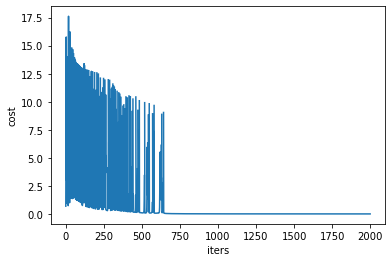

In [55]:
plt.plot(costs)
plt.xlabel('iters')
plt.ylabel('cost')